### This script shows how I preprocess data step by step

In [1]:
# run this before running other models

import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

use log instead of the original to prevent skrewed data


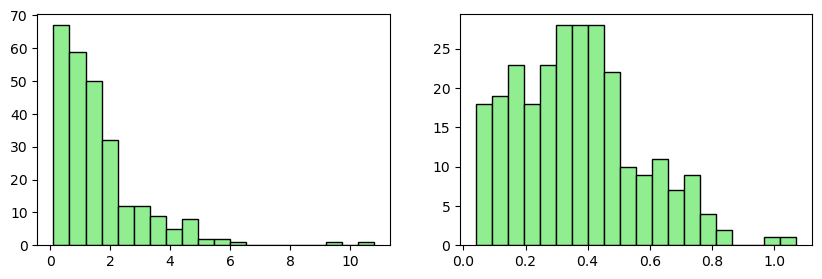

In [2]:
# load data from the excel file
data = pd.read_excel('data/eyegaze-search-snippets (timeseries)/Jae-Fourth_Exp_data.xlsx', sheet_name = 'Main')
data = data.drop(['viewport'], axis=1) # drop the viewpoint column as it contain nothing
data = data.dropna(axis=0, how='any') # drop any row contain a null

# dropping redundant column
data = data.drop(['Subject', 'Task_num', 'Time to first click', 'Accuracy'], axis=1)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
a = np.array(data['Fixation_URL'])
plt.hist(a, color='lightgreen', ec='black', bins=20)
a = np.array(data['Log(F_URL)'])
plt.subplot(1, 2, 2)
plt.hist(a, color='lightgreen', ec='black', bins=20)
print("use log instead of the original to prevent skrewed data")
plt.show()

In [3]:
data = data.drop(['Fixation _title', 'Fixation_URL', 'Fixation_snippet', 'Fixation_total', 'Log(F_total)'], axis=1)

In [4]:
data

,Task_type,Snippet_length,Shown_T_num,Log(TTF),Satisfaction,scroll,Clicked_rank,StartTime,Endtime_SERP,Log(F_title),Log(F_URL),Log(F_Snippet),Original_scanpath_value,Compressed value,Minimal value,comp-mini
0,info,long,11.0,1.060698,6.0,0.0,1.0,558.1,568.6,0.640183,0.151063,0.650793,33.0,6.0,3.0,3.0
1,info,medium,5.0,1.235528,5.0,0.0,4.0,306.9,323.1,0.472025,0.436322,0.503382,38.0,15.0,9.0,6.0
2,info,short,1.0,1.049218,2.0,1.0,5.0,99.5,109.7,0.358506,0.358886,0.358506,23.0,15.0,6.0,9.0
3,info,medium,7.0,1.064458,6.0,0.0,3.0,404.7,415.3,0.451940,0.431364,0.415140,28.0,8.0,3.0,5.0
5,info,short,3.0,0.732394,4.0,1.0,1.0,172.6,177.0,0.345570,0.124830,0.060698,8.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,nav,short,9.0,1.610660,3.0,1.0,2.0,419.0,458.8,0.881784,0.734800,0.675137,66.0,25.0,8.0,17.0
284,nav,medium,5.0,0.919078,6.0,0.0,2.0,236.7,244.0,0.527114,0.199206,0.275542,17.0,2.0,2.0,0.0
285,nav,long,3.0,0.812913,7.0,0.0,1.0,153.9,159.4,0.444825,0.130334,0.199481,12.0,1.0,1.0,0.0
286,nav,short,11.0,1.130334,3.0,0.0,1.0,518.9,531.4,0.529174,0.181272,0.255031,22.0,6.0,3.0,3.0


### Encode an normalise

In [5]:
le = LabelEncoder() # encode categorical variables
data.iloc[:, 0] = le.fit_transform(data.iloc[:,0]).astype(int) # 0 info 1 nav
data.iloc[:, 1] = le.fit_transform(data.iloc[:,1]).astype(int) # 0 long 1 median 2 short
c = data.columns
data[[c[0], c[4]]] = data[[c[4], c[0]]] # swap task type and satisfication as satisfication is label
data = data.rename(columns={c[0]: c[4], c[4]: c[0]})
c = data.columns

data.columns = range(data.shape[1]) # remove column name
data = data.astype(float) # convert all cell into float
# normalise all feature except the target
for column in data.columns[1:]:
    # the first column is target
    data[column] = data.loc[:, [column]].apply(lambda x: (x - x.mean()) / x.std())

# restore the column names
data.columns = c

# save the processed data
data.to_csv('data/snippets.csv', header = True, index = False)

# preview
data

,Satisfaction,Snippet_length,Shown_T_num,Log(TTF),Task_type,scroll,Clicked_rank,StartTime,Endtime_SERP,Log(F_title),Log(F_URL),Log(F_Snippet),Original_scanpath_value,Compressed value,Minimal value,comp-mini
0,6.0,-1.264467,1.318144,-0.549437,-0.942279,-0.610125,-0.830214,0.745881,0.707973,0.148925,-1.078422,0.493658,-0.275687,-0.358092,-0.268940,-0.350929
1,5.0,-0.023768,-0.428229,0.186524,-0.942279,-0.610125,1.709074,-0.431399,-0.431269,-0.501347,0.353216,0.003908,-0.110047,1.196727,3.491417,0.289578
2,2.0,1.216931,-1.592478,-0.597762,-0.942279,1.632729,2.555503,-1.403405,-1.421551,-0.940326,-0.035413,-0.477420,-0.606969,1.196727,1.611238,0.930084
3,6.0,-0.023768,0.153895,-0.533608,-0.942279,-0.610125,0.862644,0.026953,-0.003415,-0.579015,0.328334,-0.289261,-0.441328,-0.012576,-0.268940,0.076075
5,4.0,1.216931,-1.010354,-1.931454,-0.942279,1.632729,-0.830214,-1.060813,-1.109246,-0.990351,-1.210079,-1.466840,-1.103892,-0.703607,-0.895666,-0.564431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,3.0,1.216931,0.736019,1.765665,1.057191,1.632729,0.016215,0.093971,0.198446,1.083200,1.851201,0.574535,0.817543,2.924304,2.864691,2.638101
284,6.0,-0.023768,-0.428229,-1.145594,1.057191,-0.610125,0.016215,-0.760400,-0.798333,-0.288315,-0.836804,-0.753056,-0.805739,-1.049122,-0.895666,-0.991435
285,7.0,-1.264467,-1.010354,-1.592502,1.057191,-0.610125,-0.830214,-1.148453,-1.190919,-0.606528,-1.182458,-1.005755,-0.971380,-1.221880,-1.522392,-0.991435
286,3.0,1.216931,1.318144,-0.256300,1.057191,-0.610125,-0.830214,0.562165,0.535346,-0.280351,-0.926814,-0.821199,-0.640098,-0.358092,-0.268940,-0.350929


In [6]:
dataset  = np.array(data)
y = dataset[:, 0]
X = dataset[:, 1:]
    
# Get unique classes and their counts
unique_classes, counts = np.unique(y, return_counts=True)
desired_samples = np.max(counts)


print("Unique Class and count")
print(unique_classes)
print(counts)


Unique Class and count
[1. 2. 3. 4. 5. 6. 7.]
[ 2 15 34 40 77 70 23]


Reducing dimensionality ...
Visualising clusters ...


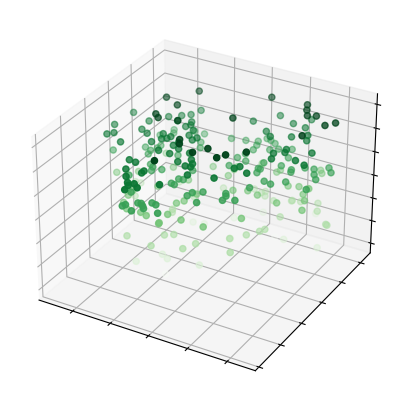

In [7]:
from scipy.sparse import issparse
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine
from sklearn.decomposition import (
    PCA,
    TruncatedSVD,
)

# This function is modified from COMP4650 Assignment 2
# It is written by teathers
def visualise_clusters(X, clusters, title=None, fout=None, sample_size=1000):
    """Visualising the clustering.

    Args:
        X: A matrix of features of documents. Each row represents a document.
        clusters (np.ndarray): The index of cluster each document belongs to, e.g., clusters[i] = k
            denotes that the i-th document is in the k-th cluster.
        title (str): Optional. The title of the figure.
        fout (str): Optional. The output figure filename.
    """

    if X.shape[0] > sample_size:
        idx = np.random.choice(X.shape[0], sample_size, replace=False)
        X = X[idx]
        clusters = clusters[idx]

    print('Reducing dimensionality ...')
    #dim = 23
    # if isinstance(X, np.ndarray):
    #     Z = PCA(n_components=dim).fit_transform(X) if X.shape[1] > dim else X
        

    t_sne = TSNE(metric=cosine, init='pca', random_state=100)
    
    Z = t_sne.fit_transform(X)

    print('Visualising clusters ...')
    points_colour = clusters
    fig = plt.figure(figsize=(5, 5))
    
    ax = plt.axes(projection='3d')
    ax.scatter3D(Z[:, 0], Z[:, 1], points_colour, c=points_colour, cmap='Greens');
    
    # plt.scatter(Z[:, 0], Z[:, 1], c=points_colour, s=20, alpha=0.9)
    # remove ticks and tick labels
    plt.tick_params(bottom=False, labelbottom=False,
                    top=False, labeltop=False,
                    left=False, labelleft=False,
                    right=False, labelright=False)
    plt.title(title, size=14)
    if fout is not None:
        plt.savefig(fout, bbox_inches='tight')
    plt.show()
    
visualise_clusters(np.array(data.iloc[:,1:]),np.array(data.iloc[:,0]))